# Data Prep Wetter 
## Allgemeines

In [1]:
# read data df_wetter.csv from _data_raw
import pandas as pd
import numpy as np

# read data
df = pd.read_csv('../_data_raw/df_wetter.csv')


# check for NAs in the data 
print(df.isnull().sum())

Datum                    0
Bewoelkung              10
Temperatur               0
Windgeschwindigkeit      0
Wettercode             669
dtype: int64


## Bewoelkung

In [2]:
# create 3 bins bewölkt_0wenig_0_2, bewölkt_1mäßig_3_5, bewölkt_2stark_6_8
# 0-2: wenig bewölkt
# 3-5: mäßig bewölkt
# 6-8: stark bewölkt

df["bewoelkt_bins"] = pd.cut(df['Bewoelkung'], bins=[-np.inf, 2, 5, 8], labels=['bewoelkt_0wenig_0_2', 'bewoelkt_1mäßig_3_5', 'bewoelkt_2stark_6_8'])

# create dummies for bewoelkt_bins ('bewölkt_0wenig_0_2', 'bewölkt_1mäßig_3_5', 'bewölkt_2stark_6_8')
df = pd.get_dummies(df, columns=['bewoelkt_bins'], drop_first=False)

# for all cases where Bewoelkung = NA: set bewölkt_0, bewölkt_1, bewölkt_2 to NA
df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_0wenig_0_2'] = np.nan
df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_1mäßig_3_5'] = np.nan
df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_2stark_6_8'] = np.nan


/tmp/ipykernel_20735/364661403.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_0wenig_0_2'] = np.nan
/tmp/ipykernel_20735/364661403.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_1mäßig_3_5'] = np.nan
/tmp/ipykernel_20735/364661403.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Bewoelkung'].isnull(), 'bewoelkt_bins_bewoelkt_2s

## Temperatur

count    2601.000000
mean       12.099586
std         7.174357
min       -10.250000
25%         6.512500
50%        12.000000
75%        17.825000
max        32.671428
Name: Temperatur, dtype: float64


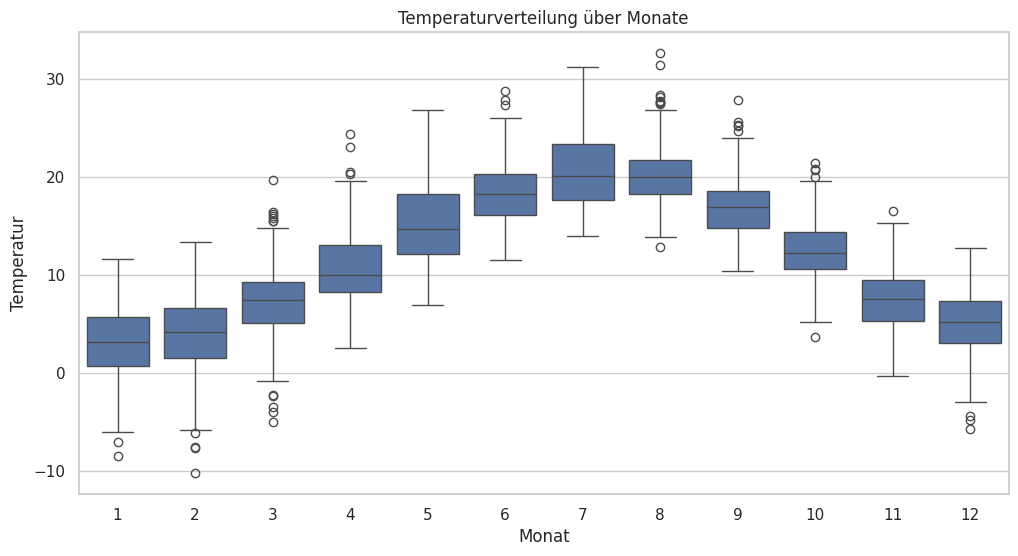

In [3]:
# show descriptive statistics (column Temperatur in df)
print(df['Temperatur'].describe())

# convert 'Datum' column to datetime
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')

# show graph for Temperatur with temperatur and months (extract month from Datum)
df['Monat'] = df['Datum'].dt.month

# show graph for Temperatur with temperatur and months (extract month from Datum)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Monat', y='Temperatur', data=df)
plt.title('Temperaturverteilung über Monate')
plt.show()


# define categories for temperature und erstelle die Kategorien als neue Spalten (min value = -10.25, max value = 32.67)
df["temp_bins"] = pd.cut(df['Temperatur'], bins=[-np.inf, 0, 10, 20, 30, 40], labels=['sehr_kalt', 'kalt', 'mild', 'warm', 'heiß'])

# for all cases where Temperatur = NA: set temp_bins and to NA
df.loc[df['Temperatur'].isnull(), 'temp_bins'] = np.nan

# create dummies for temp_bins
df = pd.get_dummies(df, columns=['temp_bins'], drop_first=False)




## Windgeschwindigkeit

In [4]:
# show descriptive statistics (column Windgeschwindigkeit in df)
print(df['Windgeschwindigkeit'].describe())


# use the Beaufortskala to create bins for Windgeschwindigkeit (careful: Windgeschwindikeit is given in m/s)
# ab 0.0 m/s: 0_Windstille
# ab 0.3 m/s: 1_Leiser Zug
# ab 1.6 m/s: 2_Leichte Brise
# ab 3.4 m/s: 3_Schwache Brise
# ab 5.5 m/s: 4_Mäßige Brise
# ab 8.0 m/s: 5_Frische Brise
# ab 10.8 m/s: 6_Starker Wind
# ab 13.9 m/s: 7_Steifer Wind
# ab 17.2 m/s: 8_Stürmischer Wind
# ab 20.8 m/s: 9_Sturm
# ab 24.5 m/s: 10_Schwerer Sturm
# ab 28.5 m/s: 11_Orkanartiger Sturm
# > 32.7 m/s: 11_Orkan
 

# create 3 bins for Windgeschwindigkeit (0-4 Beaufort: "Brise"; 5-7 Beaufort: "Wind"; ab 8 Beaufort: "Sturm"; jeweils mit einer passenden neuen Nummer)
df["wind_bins"] = pd.cut(df['Windgeschwindigkeit'], bins=[-np.inf, 5, 8, np.inf], labels=['Brise', 'Wind', 'Sturm'])


# for all cases where Windgeschwindigkeit = NA: set wind_bins to NA
df.loc[df['Windgeschwindigkeit'].isnull(), 'wind_bins'] = np.nan

# add dummies for wind_bins
df = pd.get_dummies(df, columns=['wind_bins'], drop_first=False)



count    2601.000000
mean       11.191080
std         4.124693
min         3.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        35.000000
Name: Windgeschwindigkeit, dtype: float64


## Wettercode

In [5]:
# show descriptive statistics (column wettercode in df)
print(df['Wettercode'].describe())

# list all unique values of Wettercode and sort them
print(np.sort(df['Wettercode'].unique()))

# check for NAs in wettercode
print(df['Wettercode'].isnull().sum())



# categories for wettercode: 
# 0: Bewölkungsentwicklung nicht beobachtet (NA)
# 1: Bewölkung auflösend oder abnehmend
# 2: Gleichbleibende Bewölkung
# 3: Zunehmende Bewölkung
# 5: Trockener Dunst
# 10: Feuchter Dunst
# 13: Wetterleuchten sichtbar aber kein Donner höbar
# 17: Gewitter mit hörbarem Donner, aber kein Niederschlag an der Station
# 20: Sprühregen oder Schneegriesel hat aufgehört
# 21: Regen hat aufgehört
# 22: Schneefall hat aufgehört
# 25: Regenschauer hat aufgehört
# 26: Schneeschauer hat aufgehört
# 28: Nebel hat sich aufgelöst
# 29: Gewitter hat aufgehört
# 43: Nebel, Himmel ist nicht erkennbar, Nebel dünner werdend
# 45: Nebel, Himmel ist nicht erkennbar, Nebel unverändert
# 47: Nebel, Himmel ist nicht erkennbar, Nebel wird dichter
# 49: Nebel mit Reifbildung, Himmel ist nicht erkennbar
# 51: Leichter und durchgehender nicht gefrierender Sprühregen
# 53: Durchgehender mäßiger und nicht gefrierender Sprühregen
# 55: Durchgehender starker und nicht gefrierender Sprühregen
# 58: Leichter Sprühregen mit Regen vermischt
# 60: Unterbrochener leichter nicht gefrierender Regen oder einzelne Regentropfen
# 61: Durchgehender leichter und nicht gefrierender Regen
# 63: Durchgehender mäßiger nicht gefrierender Regen
# 65: Durchgehender starker und nicht gefrierender Regen
# 68: Leichter Schneeregen
# 69: Mäßiger oder starker Schneeregen
# 71: Durchgehender leichter Schneefall
# 72: Unterbrochener mäßiger Schneefall
# 73: Durchgehender mäßiger Schneefall
# 75: Durchgehender starker Schneefall
# 77: Schneegrieseln mit oder ohne Nebel
# 78: Schneekristalle mit oder ohne Nebel
# 79: Eiskörner (gefrorene Regentropfen)
# 80: Leichter Regenschauer
# 81: Mäßiger oder starker Regenschauer
# 85: Leichter Schneeschauer
# 91: Gewitter in der letzten Stunde, leichter Regen zum Beobachtungszeitpunkt
# 95: Leichtes oder mäßiges Gewitter mit Regen oder Schnee

# if wettercode = NA: set wettercode to 0
df['Wettercode'] = df['Wettercode'].fillna(0)

# add variable wettercode_cat with the categories above for all numbers
def wettercode_to_category(code):
    categories = {
        0: "Bewölkungsentwicklung nicht beobachtet (NA)", # 0
        1: "Bewölkung auflösend oder abnehmend",
        2: "Gleichbleibende Bewölkung",
        3: "Zunehmende Bewölkung",
        5: "Trockener Dunst",
        10: "Feuchter Dunst",
        13: "Wetterleuchten sichtbar aber kein Donner hörbar",
        17: "Gewitter mit hörbarem Donner, aber kein Niederschlag an der Station",
        20: "Sprühregen oder Schneegriesel hat aufgehört",
        21: "Regen hat aufgehört",
        22: "Schneefall hat aufgehört",
        25: "Regenschauer hat aufgehört",
        26: "Schneeschauer hat aufgehört",
        28: "Nebel hat sich aufgelöst",
        29: "Gewitter hat aufgehört",
        43: "Nebel, Himmel ist nicht erkennbar, Nebel dünner werdend",
        45: "Nebel, Himmel ist nicht erkennbar, Nebel unverändert",
        47: "Nebel, Himmel ist nicht erkennbar, Nebel wird dichter",
        49: "Nebel mit Reifbildung, Himmel ist nicht erkennbar",
        51: "Leichter und durchgehender nicht gefrierender Sprühregen",
        53: "Durchgehender mäßiger und nicht gefrierender Sprühregen",
        55: "Durchgehender starker und nicht gefrierender Sprühregen",
        58: "Leichter Sprühregen mit Regen vermischt",
        60: "Unterbrochener leichter nicht gefrierender Regen oder einzelne Regentropfen",
        61: "Durchgehender leichter und nicht gefrierender Regen",
        63: "Durchgehender mäßiger nicht gefrierender Regen",
        65: "Durchgehender starker und nicht gefrierender Regen",
        68: "Leichter Schneeregen",
        69: "Mäßiger oder starker Schneeregen",
        71: "Durchgehender leichter Schneefall",
        72: "Unterbrochener mäßiger Schneefall",
        73: "Durchgehender mäßiger Schneefall",
        75: "Durchgehender starker Schneefall",
        77: "Schneegrieseln mit oder ohne Nebel",
        78: "Schneekristalle mit oder ohne Nebel",
        79: "Eiskörner (gefrorene Regentropfen)",
        80: "Leichter Regenschauer",
        81: "Mäßiger oder starker Regenschauer",
        85: "Leichter Schneeschauer",
        91: "Gewitter in der letzten Stunde, leichter Regen zum Beobachtungszeitpunkt",
        95: "Leichtes oder mäßiges Gewitter mit Regen oder Schnee"
    }
    return categories.get(code, f"Unbekannter Code: {code}")

# add variable wettercode_cat with the categories above for all numbers
df['Wettercode_cat'] = df['Wettercode'].apply(wettercode_to_category)

# wettercode_cat_condensed (3 bins: Keine Aussage, Niederschlag, Trocken)




count    1932.000000
mean       37.484472
std        27.567144
min         0.000000
25%        10.000000
50%        28.000000
75%        61.000000
max        95.000000
Name: Wettercode, dtype: float64
[ 0.  1.  2.  3.  5. 10. 13. 17. 20. 21. 22. 25. 26. 28. 29. 43. 45. 47.
 49. 51. 53. 55. 58. 60. 61. 63. 65. 68. 69. 71. 72. 73. 75. 77. 78. 79.
 80. 81. 85. 91. 95. nan]
669


## Zusammenfassen der Wettercodes für das Modell (Wettercode_cat_effect)

In [6]:
# add wettercode_effect
# Dictionary mit zusammengefassten Wetterkategorien
weather_categories = {
    '1_OPTIMAL': [1, 2],
    '2_BEEINTRÄCHTIGEND': [3, 5, 10, 28, 43,  # leicht beeinträchtigend
                          45, 47, 49, 51, 58, 60, 61, 68, 71, 77, 78, 80, 85],  # moderat beeinträchtigend
    '3_STARK_BEEINTRÄCHTIGEND': [53, 55, 63, 65, 69, 72, 73, 75, 79, 81,  # stark beeinträchtigend
                                13, 17, 91, 95],  # extrem beeinträchtigend
    '4_WETTERÄNDERUNG': [20, 21, 22, 25, 26, 29],
    '5_NICHT_KLASSIFIZIERT': [0]
}

# Funktion zur Kategorisierung
def get_weather_category(code):
    for category, codes in weather_categories.items():
        if code in codes:
            return category
    return '5_NICHT_KLASSIFIZIERT'

# Neue Spalte zum DataFrame hinzufügen
df['Wettercode_cat_effect'] = df['Wettercode'].apply(get_weather_category)

# Optional: Überprüfung der Verteilung der Kategorien
# print(df['Wettercode_cat_effect'].value_counts().sort_index())

# create dummies for wettercode_cat_effect
df = pd.get_dummies(df, columns=['Wettercode_cat_effect'], drop_first=False)




In [7]:
# save df as wetter_clean.csv in _Variables_cleaned
df.to_csv('../_Variables_cleaned/df_wetter_clean.csv', index=False)
